In [1]:
import pandas as pd
import numpy as np

In [2]:
telco = pd.read_csv('Churn.csv')
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [3]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [4]:
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [7]:
sub_col = ['CustServ_Calls','Vmail_Message','Churn']
telco_sub=telco[sub_col]
telco_sub.head()

,CustServ_Calls,Vmail_Message,Churn
0,1,25,no
1,1,26,no
2,0,0,no
3,2,0,no
4,3,0,no


In [9]:
telco_sub.groupby('Churn').mean()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.449825,8.604561
yes,2.229814,5.115942


In [10]:
telco_sub.groupby('Churn').std()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.163883,13.913125
yes,1.853275,11.860138


### Churn by State
When dealing with customer data, geographic regions may play an important part in determining whether a customer will cancel their service or not.
We will group 'State' and 'Churn' to count the number of churners and non-churners by state.
For example, if you wanted to group by x and aggregate by y, you could use .groupby() as follows:

df.groupby('x')['y'].value_counts()

In [11]:
state_col=['Churn','State']
telco_state=telco[state_col]
telco_state.head()

,Churn,State
0,no,KS
1,no,OH
2,no,NJ
3,no,OH
4,no,OK


In [12]:
telco_state.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
GA     no       46
       yes       8
HI     no       50
       yes       3
IA     no       41
       yes       3
ID     no       64
       yes       9
IL     no       53
       yes       5
                ..
OK     no       52
       yes       9
OR     no       67
       yes      11
PA     no       37
       yes       8
RI     no       59
       yes       6
SC     no       46
       yes      14
SD     no       52
       yes       8
TN     no       48
       yes       5
TX     no       54
       yes      18
UT     no       62
       yes      10
VA     no       72
       yes       5
VT     no       65

#### Note: Indeed! While California is the most populous state in the U.S, there are not as many customers from California in our dataset. Arizona (AZ), for example, has 64 customers, 4 of whom ended up churning. In comparison, California has a higher number (and percentage) of customers who churned. This is useful information for a company!

### Visualize the distributions of 'Day_Mins','Eve_Mins','Night_Mins','Intl_Mins'

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

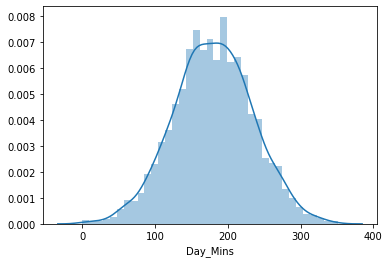

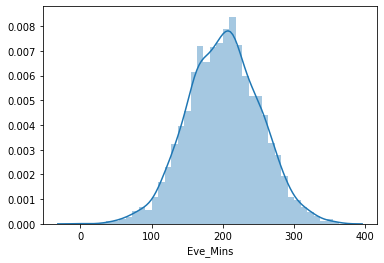

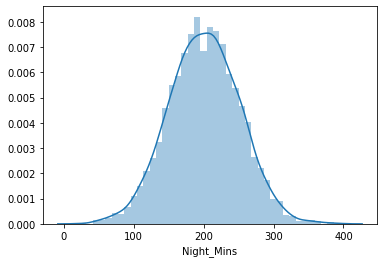

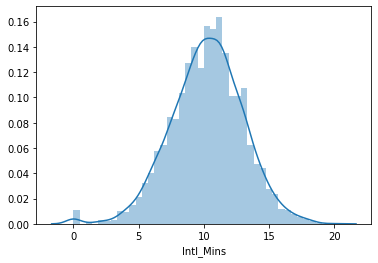

In [17]:
cols = ['Day_Mins','Eve_Mins','Night_Mins','Intl_Mins']
for col in cols:
    sns.distplot(telco[col])
    plt.show()

##### All of these features appear to be well approximated by the normal distribution. If this were not the case, we would have to consider applying a feature transformation of some kind.

### Customer service calls and churn
We have already seen that there's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

Let's now visualize this difference using a box plot and incorporate other features of interest - do customers who have international plans make more customer service calls? Or do they tend to churn more? How about voicemail plans? Let's find out using box plot from seaborn:

sns.boxplot(x = "X-axis variable",
            y = "Y-axis variable",
            data = DataFrame)
If you want to remove outliers, specify the additional parameter sym="", and can add a third variable using hue.

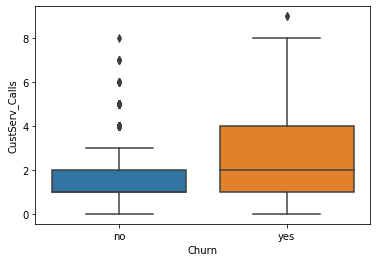

In [18]:
sns.boxplot(x='Churn', y='CustServ_Calls', data=telco)
plt.show()

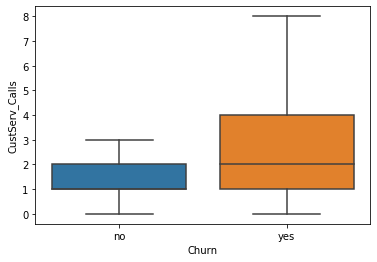

In [20]:
# There is a very noticeable difference here between churners and non-churners! Now, remove the outliers from the box plot.
sns.boxplot(x='Churn', y='CustServ_Calls', data=telco, sym="")
plt.show()

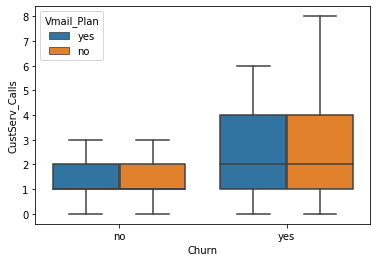

In [21]:
# Add a third variable to this plot - 'Vmail_Plan' - to visualize whether or not having a voice mail plan affects
# the number of customer service calls or churn.
sns.boxplot(x='Churn', y='CustServ_Calls', hue='Vmail_Plan', data=telco, sym="")
plt.show()

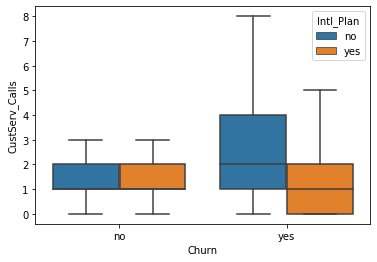

In [22]:
#Not much of a difference there. Update your code so that the third variable is 'Intl_Plan' instead.
sns.boxplot(x='Churn', y='CustServ_Calls', hue='Intl_Plan', data=telco, sym="")
plt.show()

#### There are some very interesting insights here. It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn.

### Encoding binary features
Recasting data types is an important part of data preprocessing. We will assign the values 1 to 'yes' and 0 to 'no' to the 'Vmail_Plan' and 'Churn' features, respectively.

There are two approaches to doing this - one using pandas, and the other using scikit-learn. For straightforward tasks like this, sticking with pandas is recommended, so that's what we'll do in this exercise. If you're trying to build machine learning pipelines, on the other hand - you can explore using LabelEncoder(). When doing data science, it's important to be aware that there is always more than one way to accomplish a task, and you need to pick the one that is most effective for your application.

In [23]:
# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan'
telco['Vmail_Plan'] = telco['Vmail_Plan'].replace({'no':0,'yes':1})

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'no':0,'yes':1})

# Print the results to verify
print(telco['Vmail_Plan'].head())
print(telco['Churn'].head())

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


### One hot encoding
In the video, you saw how the 'State' feature can be encoded numerically using the technique of one hot encoding:

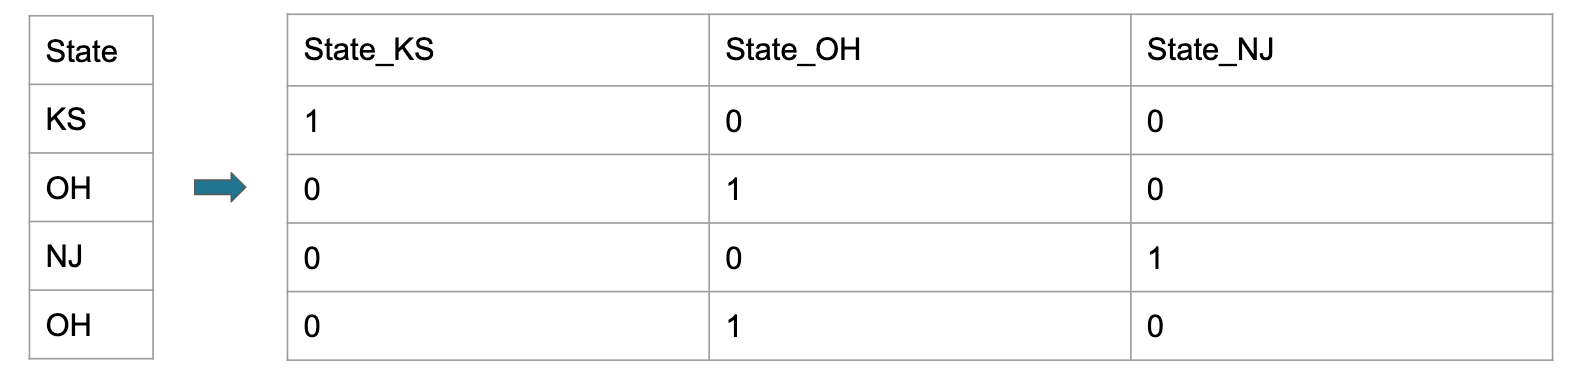

Doing this manually would be quite tedious, especially when you have 50 states and over 3000 customers! Fortunately, pandas has a get_dummies() function which automatically applies one hot encoding over the selected feature.

In [24]:
# Perform one hot encoding on 'State'
telco_state = pd.get_dummies(telco['State'])
telco_state.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Feature scaling
We saw the different scales of the 'Intl_Calls' and 'Night_Mins' features:

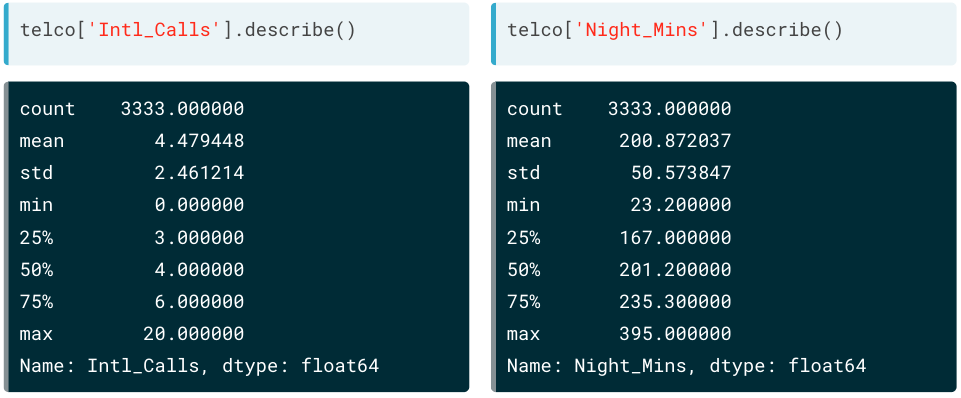

Now we shall re-scale them using StandardScaler.
To apply StandardScaler, you need to first instantiate it using StandardScaler(), and then apply the fit_transform() method, passing in the DataFrame you want to rescale. You can do this in one line of code:

StandardScaler().fit_transform(df)

In [29]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale telco using StandardScaler
telco_scaled = StandardScaler().fit_transform(telco[['Intl_Calls', 'Night_Mins']])

# Add column names back for readability
telco_scaled_df = pd.DataFrame(telco_scaled, columns=["Intl_Calls", "Night_Mins"])

# Print summary statistics
print(telco_scaled_df.describe())

         Intl_Calls    Night_Mins
count  3.333000e+03  3.333000e+03
mean  -1.264615e-16  6.602046e-17
std    1.000150e+00  1.000150e+00
min   -1.820289e+00 -3.513648e+00
25%   -6.011951e-01 -6.698545e-01
50%   -1.948306e-01  6.485803e-03
75%    6.178983e-01  6.808485e-01
max    6.307001e+00  3.839081e+00


### Dropping unnecessary features
Some features such as 'Area_Code' and 'Phone' are not useful when it comes to predicting customer churn, and they need to be dropped prior to modeling. The easiest way to do so in Python is using the .drop() method of pandas DataFrames, 

telco.drop(['col1', 'col2'], axis=1)
Here, axis=1 indicates that you want to drop the specified columns.

In [35]:
# Drop the unnecessary features
telco = telco.drop(['Area_Code','Phone'],axis=1)
telco.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State'],
      dtype='object')

### Engineering a new column
Leveraging domain knowledge to engineer new features is an essential part of modeling.

This quote from Andrew Ng summarizes the importance of feature engineering:

Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.

Now create a new feature that contains information about the average length of night calls made by customers.

In [36]:
# Create the new feature
telco['Avg_Night_Calls'] = telco['Night_Mins']/telco['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(telco['Avg_Night_Calls'].head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


### Predicting whether a new customer will churn
We train a model using sklearn:

Import the model of interest from sklearn
Instantiate it:

Train it, or "fit it", to the data:

clf.fit(telco['data'], telco['target'])

Here, the first argument consists of the features, while the second argument is the label that we are trying to predict - whether or not the customer will churn. After you've fitted the model, you can use the model's .predict() method to predict the label of a new customer.

This process is true no matter which model you use.

In [55]:
telco['Intl_Plan'] = telco['Intl_Plan'].replace({'no':0,'yes':1})
telco['Intl_Plan'][:5]

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

In [56]:
features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge']

In [57]:
telco[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Intl_Plan         3333 non-null int64
Vmail_Plan        3333 non-null int64
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
dtypes: float64(8), int64(9)
memory usage: 442.7 KB


In [62]:
new_customer = [[ 91.  ,  23.  , 232.4 , 186.  , 190.5 ,  12.3 ,   3.  ,   0.  ,
          1.  ,  97.  ,  39.51,  88.  ,  15.81, 128.  ,   8.57,   3.  ,
          3.32]]

In [64]:
# Using Logistic Regression

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(telco[features], telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


D:\Softwares\Anaconda\Conda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Training another scikit-learn model
All sklearn models have .fit() and .predict() methods.This feature allows to easily try many different models to see which one gives you the best performance. We will try fitting a DecisionTreeClassifier.

In [65]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier
clf = DecisionTreeClassifier()

# Fit the classifier
clf.fit(telco[features],telco['Churn'])

# Predict the label of new_customer
print(clf.predict(new_customer))

[0]


In [66]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Avg_Night_Calls
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,2.689011
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,2.469903
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,1.563462
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,2.212360
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,1.544628


In [67]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
Account_Length     3333 non-null int64
Vmail_Message      3333 non-null int64
Day_Mins           3333 non-null float64
Eve_Mins           3333 non-null float64
Night_Mins         3333 non-null float64
Intl_Mins          3333 non-null float64
CustServ_Calls     3333 non-null int64
Churn              3333 non-null int64
Intl_Plan          3333 non-null int64
Vmail_Plan         3333 non-null int64
Day_Calls          3333 non-null int64
Day_Charge         3333 non-null float64
Eve_Calls          3333 non-null int64
Eve_Charge         3333 non-null float64
Night_Calls        3333 non-null int64
Night_Charge       3333 non-null float64
Intl_Calls         3333 non-null int64
Intl_Charge        3333 non-null float64
State              3333 non-null object
Avg_Night_Calls    3333 non-null float64
dtypes: float64(9), int64(10), object(1)
memory usage: 520.9+ KB


In [68]:
telco = telco.drop(['State','Avg_Night_Calls'],axis=1)
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [69]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null int64
Intl_Plan         3333 non-null int64
Vmail_Plan        3333 non-null int64
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
dtypes: float64(8), int64(10)
memory usage: 468.8 KB


### Creating training and test sets

In [77]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

### Computing Accuracy

In [78]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit to the training data
clf.fit(X_train,y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.951


### Confusion Matrix

In [79]:
y_pred = clf.predict(X_test)

In [80]:
y_pred.shape

(1000,)

In [81]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[851   6]
 [ 43 100]]


### Accuracy vary on varying size of training and testing set
### Now we shall train model with 20% test set and compare accuracy with previous 30% test set

In [82]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit to the training data
clf.fit(X_train,y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.952023988005997


In [83]:
### Confusion_matrix

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))

[[562   4]
 [ 28  73]]


In [ ]:
### Now with 10% test set

In [84]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit to the training data
clf.fit(X_train,y_train)

# Compute accuracy
print(clf.score(X_test, y_test))

0.9505247376311844


In [85]:
# confusion_matrix
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[560   6]
 [ 27  74]]


In [86]:
# Precision Recall score
# Import recall_score
from sklearn.metrics import recall_score,precision_score

# Print the precision
print(precision_score(y_test, y_pred))

# Print the recall
print(recall_score(y_test, y_pred))

0.925
0.7326732673267327


### ROC Curve

In [88]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit to the training data
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

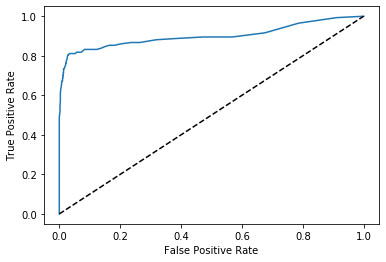

In [89]:
# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

### Area under the curve - AUC score
The ROC curve above looks like a well-performing model visually. Let's quantify this by computing the area under the curve.

In [91]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))


# The score indicates that this baseline * random forest classifier * is quite good!

0.9005352873497564


### F1 score
As we've discovered, there's a tradeoff between precision and recall. Both are important metrics, and depending on how the business is trying to model churn, we may want to focus on optimizing one over the other. Often, stakeholders are interested in a single metric that can quantify model performance. The AUC is one metric you can use in these cases, and another is the F1 score, which is calculated as below:

2 * (precision * recall) / (precision + recall)

The advantage of the F1 score is it incorporates both precision and recall into a single metric, and a high F1 score is a sign of a well-performing model, even in situations where you might have imbalanced classes. In scikit-learn, we can compute the f-1 score using using the f1_score function.

In [93]:
# Instantiate the classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test,y_pred))

0.8030888030888031


### Tuning the number of features
The default hyperparameters used by models are not optimized for data. The goal of grid search cross-validation is to identify those hyperparameters that lead to optimal model performance. Now will start tuning the max_features hyperparameter.

Hyperparameter	Purpose
max_features	Number of features for best split

A random forest is an ensemble of many decision trees. The n_estimators hyperparameter controls the number of trees to use in the forest, while the max_features hyperparameter controls the number features the random forest should consider when looking for the best split at decision tree.


In [94]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {'max_features': ['auto', 'sqrt', 'log2']}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X, y)

# Print the optimal parameters
print(grid_search.best_params_)


# It looks like taking a log of the number of features leads to optimal model performance. 
# By default, the model takes the square root of the number of features.

D:\Softwares\Anaconda\Conda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_features': 'log2'}


### Tuning other hyperparameters
The power of GridSearchCV really comes into play when you're tuning multiple hyperparameters, as then the algorithm tries out all possible combinations of hyperparameters to identify the best combination. Here, we'll tune the following random forest hyperparameters:

Hyperparameter	Purpose
criterion	Quality of Split
max_features	Number of features for best split
max_depth	Max depth of tree
bootstrap	Whether Bootstrap samples are used

In [96]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

# Fit the model
grid_search.fit(X,y)

#best_parameters
grid_search.best_params_

D:\Softwares\Anaconda\Conda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 10}

In [ ]:
# {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}

### Randomized search

####Call GridSearchCV
grid_search = GridSearchCV(clf, param_grid)

####Fit the model
grid_search.fit(X, y)

In the above chunk of code you may have noticed that the first line of code did not take much time to run, while the call to .fit() took several seconds to execute.

This is because .fit() is what actually performs the grid search, and in our case, it was grid with many different combinations. As the hyperparameter grid gets larger, grid search becomes slower. In order to solve this problem, instead of trying out every single combination of values, we could randomly jump around the grid and try different combinations. There's a small possibility we may miss the best combination, but we would save a lot of time, or be able to tune more hyperparameters in the same amount of time.

In [102]:
# import random module
import random

# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": random.randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Call RandomizedSearchCV
random_search = RandomizedSearchCV(clf, param_dist)

# Fit the model
random_search.fit(X,y)

# Print best parameters
print(random_search.best_params_)

TypeError: Parameter grid value is not iterable (key='max_features', value=1)

In [ ]:
# {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10}

### Visualizing feature importances

Let's visualize the feature importances and get a sense for what the drivers of churn are, using matplotlib's barh to create a horizontal bar plot of feature importances.

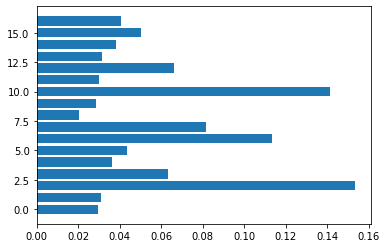

In [103]:
# Calculate feature importances
importances = clf.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances) # X.shape[1] gives the number of features in this case it 17(labels/features/columns)
plt.show()

In [109]:
print(range(X.shape[1]))

range(0, 17)


In [110]:
X.shape

(3333, 17)

### Improving the plot
In order to make the plot more readable, we need to do achieve two goals:

Re-order the bars in ascending order.
Add labels to the plot that correspond to the feature names.
To do this, we'll take advantage of NumPy indexing. The .argsort() method sorts an array and returns the indices. We'll use these indices to achieve both goals.

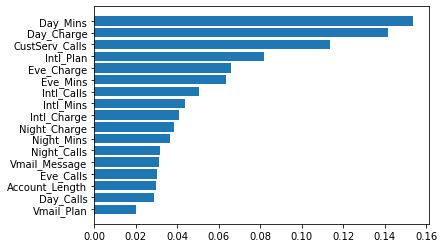

In [111]:
# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()


#The plot tells us that CustServ_Calls, Day_Mins and Day_Charge are the most important drivers of churn. 